<img src="diamond.png" alt="diamond" width="200"/>

# The Diamond Challenge #

Congratulations! You've just been hired by a prestigious diamond retailer as their lead data analyst. In this challenge, you will put your data analysis skills to the test by uncovering insights about the diamond market. 


This notebook contains a number of questions to answer, ordered by difficulty (easiest first). Below the question cell, answer the question by using Python code to manipulate and query the data. Some of the earlier questions have code to get you started. If you are already proficient in Python, feel free to skip to the later questions.

Data source: https://www.kaggle.com/shivam2503/diamonds. You might need this to understand some of the attributes in the data set.

Packages used in this challenge: **pandas**, **seaborn**, **sklearn**

*If using Anaconda package manager, use* **conda install *packagename** to install these packages*

### Challenge #1: Analyzing cuts ###

For the first challenge, your boss wants to know the answers to the following questions:
- How many diamonds of each type of cut are there? 
- How much do they cost on average? 

We've included some starter code to read in the data for you.

In [1]:
#Import your important data science libraries!

import pandas as pd

#Then, import the data and view what the entries look like.

df = pd.read_csv("diamonds.csv")

df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [2]:
#It looks like the first column is not needed, so we can clean up the dataset by dropping this column. 
df.drop("Unnamed: 0", axis = 1, inplace = True)

How can you summarize the number of each cut and average price by cut?

HINT: The pandas documentation, found at https://pandas.pydata.org/pandas-docs/stable/reference/, will be your friend. 
You want to analyze your data by counting certain groups.

In [3]:
# summarized number of each cut
df['cut'].value_counts()

Ideal        13573
Premium       8640
Very Good     7645
Good          3088
Fair           994
Name: cut, dtype: int64

In [4]:
# average price per cut
unique_cuts = df.groupby(df['cut']).mean()
unique_cuts = unique_cuts.drop(columns= ['carat', 'depth', 'table', 'x', 'y', 'z'])
unique_cuts

,price
cut,
Fair,4320.607646
Good,3916.045984
Ideal,3453.603404
Premium,4595.062037
Very Good,3998.124133


### Challenge #2: Summary statistics for color, clarity, and cut ###

Now, the leadership at the company wants to get a general idea of what the diamond stock looks like. The attributes cut, color, and clarity are categorically ordered variables - this means that they are represented by discrete values that can be ordered from highest (best quality) to lowest (worst quality) or vice versa. Can you turn these variables from strings to numbers, and generate summary statistics for these variables?

In [5]:
# order of cut quality with given value:
# fair: 0.2, good: 0.4, very good: 0.6, premium: 0.8, ideal: 1

df['cut'] = df['cut'].replace(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], [1, 2, 3, 4, 5])

In [6]:
df['color'].value_counts()

G    7172
E    6114
F    5904
H    5309
D    4277
I    3391
J    1773
Name: color, dtype: int64

In [7]:
# order of colour with given value:
# J: 1, I: 2, H: 3, G: 4, F: 5, E: 6, D: 7

df['color'] = df['color'].replace(['J', 'I', 'H', 'G', 'F', 'E', 'D'], [1, 2, 3, 4, 5, 6, 7])

In [8]:
df['clarity'].value_counts()

SI1     8237
VS2     7665
SI2     5840
VS1     5105
VVS2    3170
VVS1    2360
IF      1102
I1       461
Name: clarity, dtype: int64

In [9]:
# order of clarity:
# (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

df['clarity'] = df['clarity'].replace(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], [1, 2, 3, 4, 5, 6, 7, 8])

In [10]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
2,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
3,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48


In [11]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000
mean,0.797752,3.904832,4.399322,4.048114,61.747793,57.457113,3934.301355,5.730165,5.732369,3.538519
std,0.474803,1.115195,1.701622,1.649335,1.434228,2.239867,3998.529007,1.122975,1.114281,0.712177
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5342.000000,6.530000,6.530000,4.030000
max,4.130000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.140000,10.100000,31.800000


Color : Average color is about G

Clarity : Average clarity is about VS2

Cut : Average cut is about Premium

In [12]:
df.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

### Challenge #3: Carat Distribution ###

The term "carat" refers to the weight of the diamond. Can you create a data visualization that shows how the weights of the diamonds in the dataset are distributed, to give your company leadership a more precise look at this highly-advertised variable?

HINT: Seaborn (https://seaborn.pydata.org/) is a useful tool for visualizations in Python. This type of visualization is referred to as a "histogram." 

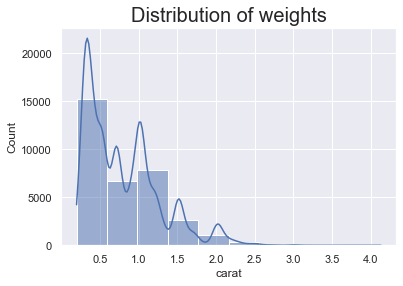

In [13]:
# import the data visualization package
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
plt.title("Distribution of weights", fontsize= 20)
sns.histplot(x="carat", data= df, bins=10, kde= True)
plt.show()

### Challenge #4: Give me ALL of the diamonds! ###

The board of directors got a taste of your visualization skills, and they want more. The board has requested a visualization that includes EVERY attribute in the dataset, with the size attributes (x, y, z, depth, table) summarized into one. Engineer a single feature to describe the size of the diamond, and create a visualization of all of the attributes in the dataset

In [32]:
# creating new column, size, multiplying length, width, depth
df['size'] = df.apply(lambda row: (row.x * row.y * row.z).round(2), axis= 1)

In [35]:
df_pairplot = df.drop(columns= ['x', 'y', 'z'])
df_pairplot.head()

,carat,cut,color,clarity,depth,table,price,size
0,0.23,5,6,2,61.5,55.0,326,38.20
1,0.23,2,6,5,56.9,65.0,327,38.08
2,0.29,4,2,4,62.4,58.0,334,46.72
3,0.31,2,1,2,63.3,58.0,335,51.92
4,0.24,3,1,6,62.8,57.0,336,38.69


In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(df_pairplot, diag_kind= 'hist')
plt.show()

In [15]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43,38.20
1,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31,38.08
2,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,46.72
3,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,51.92
4,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48,38.69


### Challenge #5: Pricing the diamonds ###

There is good news and bad news. The good news: on account of your great skill in data analysis, you've been promoted to CEO (Chief Executive Officer)! The bad news: the previous CEO mismanaged the company so badly that the entire staff of professional diamond appraisers has been laid off, and no one wants to work for your company. Obviously, he was fired. 

For this challenge,  you'll need to develop a low-cost, labor-free solution to this debacle. Train a machine learning algorithm to estimate the price of diamond based on its weight (carat), cut, color, clarity, and size (depth, table, x, y, z). 

HINT: Sci-kit Learn is a Python package that provides machine learning algorithms that you can train on your data set. You may find the documentation helpful: https://scikit-learn.org/stable/

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# target and features
y = df.price
dependents  = ["carat", "cut", "color", "clarity", 'size']
X = df[dependents]

# training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
diamond_model = RandomForestRegressor()
diamond_model.fit(train_X, train_y)

predictions = diamond_model.predict(val_X)

In [28]:
# creating function utilising model
def get_price(weight, cut, color, clarity, size):
    y = df.price
    dependents  = ["carat", "cut", "color", "clarity", "size"]
    X = df[dependents]
    
    diamond_model = RandomForestRegressor()
    diamond_model.fit(X, y)
    
    predictions = diamond_model.predict(pd.DataFrame({'carat': [weight], 'cut': [cut], 'color': [color], 'clarity': [clarity],
                                                     'size': [size]}))
    return "Predicted price of Diamond: {}".format(int(predictions[0]))

In [29]:
#Example 1: 
get_price(0.25, 3, 1, 2, 40)

'Predicted price of Diamond: 391'

### Challenge #6: Automation Hits the Diamond Market! ###

After you successfully deployed your automated diamond pricing system, your competitors caught on and have developed their own algorithms to price diamonds. As a result, the diamond wholesaler (which sells the diamonds to you) has created an online bidding system to sell their diamonds. 

To be able to snatch up diamonds before your competitors do, and ensure you get the best prices, you must build a bot that purchases diamonds at the lowest possible price based on the characteristics of each diamond that is put up for auction. Keep in mind that if your bot overvalues the diamond and buys at that price, you will lose money! However, if your bot undervalues the diamond, it will lose out to other, more accurate bots.